In [28]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.signal as signal
import scipy.stats as stats
import torch
import uncertainty_toolbox as uct

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

from src.probabilistic_flow_boosting.extras.datasets.uci_dataset import UCIDataSet
from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal, EmbeddableRandomForest
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow

In [7]:
RANDOM_SEED = 42
TRAIN = True
MODEL_FILEPATH = 'treeflow_wine_rf_version.model'

In [8]:
x_train = UCIDataSet(
    filepath_data = "data/01_raw/UCI/wine-quality-red/data.txt",
    filepath_index_columns = "data/01_raw/UCI/wine-quality-red/index_features.txt",
    filepath_index_rows = "data/01_raw/UCI/wine-quality-red/index_train_1.txt"
).load()
y_train = UCIDataSet(
    filepath_data = "data/01_raw/UCI/wine-quality-red/data.txt",
    filepath_index_columns = "data/01_raw/UCI/wine-quality-red/index_target.txt",
    filepath_index_rows = "data/01_raw/UCI/wine-quality-red/index_train_1.txt"
).load()

x_test = UCIDataSet(
    filepath_data = "data/01_raw/UCI/wine-quality-red/data.txt",
    filepath_index_columns = "data/01_raw/UCI/wine-quality-red/index_features.txt",
    filepath_index_rows = "data/01_raw/UCI/wine-quality-red/index_test_1.txt"
).load()
y_test = UCIDataSet(
    filepath_data = "data/01_raw/UCI/wine-quality-red/data.txt",
    filepath_index_columns = "data/01_raw/UCI/wine-quality-red/index_target.txt",
    filepath_index_rows = "data/01_raw/UCI/wine-quality-red/index_test_1.txt"
).load()

In [6]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=RANDOM_SEED)

In [9]:
if TRAIN:
    tree = EmbeddableRandomForest(
        n_estimators=100,
        max_depth=2,
        random_state=RANDOM_SEED
    )
    flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(80, 80, 40), 
                                     num_blocks=3, context_dim=40, conditional=True)

    treeflow = TreeFlowBoost(tree, flow, embedding_size=40)

    treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=200, batch_size=2048, verbose=True)
    treeflow.save(MODEL_FILEPATH)
else:
    treeflow = TreeFlowBoost.load(MODEL_FILEPATH)

/Users/pwielopolski/Projects/Probabilistic-Flow-Boosting/src/probabilistic_flow_boosting/tfboost/tree/erandomforest.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  super().fit(X, y, sample_weight=None)


train loss: 6.817503929138184
val loss: 2.935957908630371
train loss: 1.4520198106765747
val loss: 2.1095752716064453
train loss: 3.1356287002563477
val loss: 3.372714042663574
train loss: 2.960780143737793
val loss: 2.818037986755371
train loss: 2.021261215209961
val loss: 1.9099265336990356
train loss: 1.368231177330017
val loss: 1.3800530433654785
train loss: 1.1275213956832886
val loss: 1.2158453464508057
train loss: 1.11379075050354
val loss: 1.2280116081237793
train loss: 1.1550772190093994
val loss: 1.2736402750015259
train loss: 1.1754045486450195
val loss: 1.2838807106018066
train loss: 1.1656622886657715
val loss: 1.2758309841156006
train loss: 1.1366506814956665
val loss: 1.2387828826904297
train loss: 1.093651533126831
val loss: 1.2057881355285645
train loss: 1.056369423866272
val loss: 1.1726053953170776
train loss: 1.02911376953125
val loss: 1.1490824222564697
train loss: 1.0082505941390991
val loss: 1.1380374431610107
train loss: 0.9983958005905151
val loss: 1.1235848665

KeyboardInterrupt: 

[Text(0.5, 0.8333333333333334, 'X[10] <= 10.35\nsquared_error = 0.637\nsamples = 725\nvalue = 5.62'),
 Text(0.25, 0.5, 'X[0] <= 11.1\nsquared_error = 0.426\nsamples = 415\nvalue = 5.322'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.387\nsamples = 389\nvalue = 5.272'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.4\nsamples = 26\nvalue = 6.103'),
 Text(0.75, 0.5, 'X[1] <= 0.99\nsquared_error = 0.642\nsamples = 310\nvalue = 6.012'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.542\nsamples = 304\nvalue = 6.057'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.56\nsamples = 6\nvalue = 3.8')]

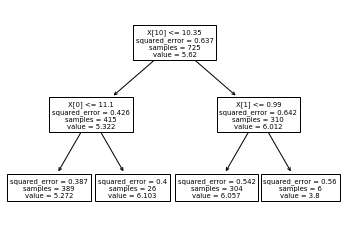

In [25]:
plot_tree(treeflow.tree_model.estimators_[3])

In [16]:
tree = treeflow.tree_model.estimators_[0].tree_

In [21]:
tree.threshold[tree.feature > 0]

array([10.5250001 ,  0.535     ,  0.64499998])

[Text(0.5, 0.8333333333333334, 'X[10] <= 10.525\nsquared_error = 0.597\nsamples = 731\nvalue = 5.635'),
 Text(0.25, 0.5, 'X[9] <= 0.535\nsquared_error = 0.402\nsamples = 436\nvalue = 5.339'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.176\nsamples = 95\nvalue = 4.97'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.417\nsamples = 341\nvalue = 5.456'),
 Text(0.75, 0.5, 'X[9] <= 0.645\nsquared_error = 0.565\nsamples = 295\nvalue = 6.069'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.458\nsamples = 122\nvalue = 5.75'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.519\nsamples = 173\nvalue = 6.291')]

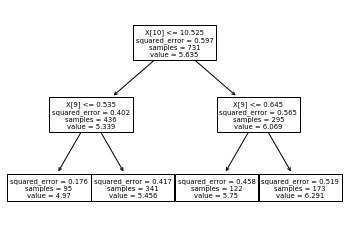

In [14]:
plot_tree(tree)